# 1、Python库导入与数据读取

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc

In [29]:
df = pd.read_csv("user_log_format1.csv")

In [30]:
# 查看数据信息
df.shape

(54925330, 7)

In [31]:
# 查看数据信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   seller_id    int64  
 4   brand_id     float64
 5   time_stamp   int64  
 6   action_type  int64  
dtypes: float64(1), int64(6)
memory usage: 2.9 GB


In [32]:
# 缺失值处理
df.isnull().sum()

user_id            0
item_id            0
cat_id             0
seller_id          0
brand_id       91015
time_stamp         0
action_type        0
dtype: int64

In [33]:
df = df[~df.isnull().any('columns')]#缺失值较少可以直接删除

In [34]:
df.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54834315 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   seller_id    int64  
 4   brand_id     float64
 5   time_stamp   int64  
 6   action_type  int64  
dtypes: float64(1), int64(6)
memory usage: 3.3 GB


In [37]:
df['month'] = np.floor(df.time_stamp/100)
df['day'] = df.time_stamp-df['month']*100
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54834315 entries, 0 to 54925329
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   seller_id    int64  
 4   brand_id     float64
 5   time_stamp   int64  
 6   action_type  int64  
 7   month        float64
 8   day          float64
dtypes: float64(3), int64(6)
memory usage: 4.1 GB


In [42]:
user = pd.read_csv("user_info_format1.csv")
print(user.shape)
user.head()

(424170, 3)


,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [43]:
user[user.duplicated()].shape#无重复值

(0, 3)

In [44]:
user.info()#性别和年龄范围有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


In [45]:
user.isnull().sum()

user_id         0
age_range    2217
gender       6436
dtype: int64

In [46]:
user.age_range.fillna(0,inplace=True)
user.gender.fillna(2,inplace=True)
user.isnull().sum()

user_id      0
age_range    0
gender       0
dtype: int64

In [47]:
df = pd.merge(df,user,how='left',on='user_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54834315 entries, 0 to 54834314
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   seller_id    int64  
 4   brand_id     float64
 5   time_stamp   int64  
 6   action_type  int64  
 7   month        float64
 8   day          float64
 9   age_range    float64
 10  gender       float64
dtypes: float64(5), int64(6)
memory usage: 4.9 GB


In [48]:
df.isnull().sum()

user_id        0
item_id        0
cat_id         0
seller_id      0
brand_id       0
time_stamp     0
action_type    0
month          0
day            0
age_range      0
gender         0
dtype: int64

In [63]:
import matplotlib.pyplot as plt  
  
def getPlot(temp):  
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))  
    fig.suptitle('商品浏览与购买行为分析/年龄段', fontsize=16)  # 增加主标题  
    x = temp.index  
  
    # 第一个子图  
    ax[0].plot(x, temp[0], 'b-', linewidth=2, label='浏览次数')  
    ax[0].set_xlabel(x.name, fontsize=12)  
    ax[0].set_ylabel('浏览次数', fontsize=12)  
    ax1 = ax[0].twinx()  
    ax1.plot(x, temp['rate'], 'r--', linewidth=2, label='购买率')  
    ax1.set_ylabel('购买率（%）', fontsize=12)  
    ax[0].legend(loc='upper left', fontsize=10)  
    ax1.legend(loc='upper right', fontsize=10)  
  
    # 第二个子图  
    ax[1].plot(x, temp[2], 'r-', linewidth=2, label='购买')  
    ax[1].plot(x, temp[3], 'g-', linewidth=2, label='收藏')  
    ax[1].set_xlabel(x.name, fontsize=12)  
    ax[1].set_ylabel('次数', fontsize=12)  
    ax[1].legend(loc='best', fontsize=10)  
  
    # 第三个子图  
    ax[2].plot(x, temp[2], 'r-', linewidth=2, label='购买')  
    ax[2].set_xlabel(x.name, fontsize=12)  
    ax[2].set_ylabel('购买次数', fontsize=12)  
    ax2 = ax[2].twinx()  
    ax2.plot(x, temp[1], 'y--', linewidth=2, label='加入购物车')  
    ax2.set_ylabel('加购次数', fontsize=12)  
    ax[2].legend(loc='upper left', fontsize=10)  
    ax2.legend(loc='upper right', fontsize=10)   
    plt.subplots_adjust(wspace=0.4)  # 调整子图间距  
    plt.show()

month
5.0     10.347
6.0      5.486
7.0      6.485
8.0      6.284
9.0      6.476
10.0     5.781
11.0     7.362
Name: rate, dtype: float64
month
5.0      2299526
6.0      5715897
7.0      4334576
8.0      4581209
9.0      5657308
10.0     7624845
11.0    18337352
Name: 0, dtype: int64


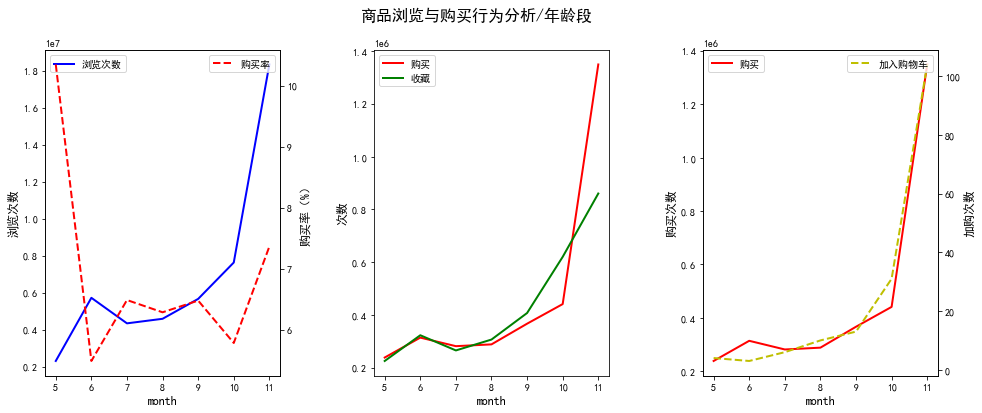

In [65]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
temp = df.pivot_table(index='month',columns='action_type',values='item_id',aggfunc='count')
temp['rate'] = round(temp[2]/temp[0]*100,3)
print(temp['rate'])
print(temp[0])
getPlot(temp)

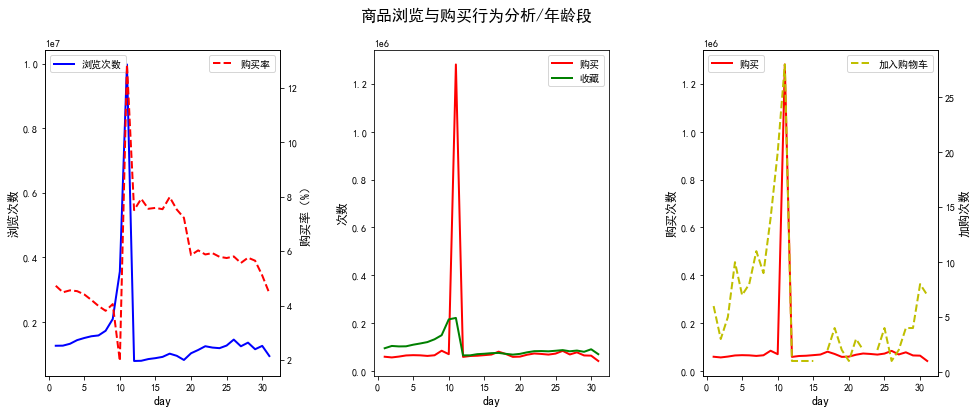

In [66]:
temp = df.pivot_table(index='day',columns='action_type',values='item_id',aggfunc='count')
temp['rate'] = round(temp[2]/temp[0]*100,3)
getPlot(temp)

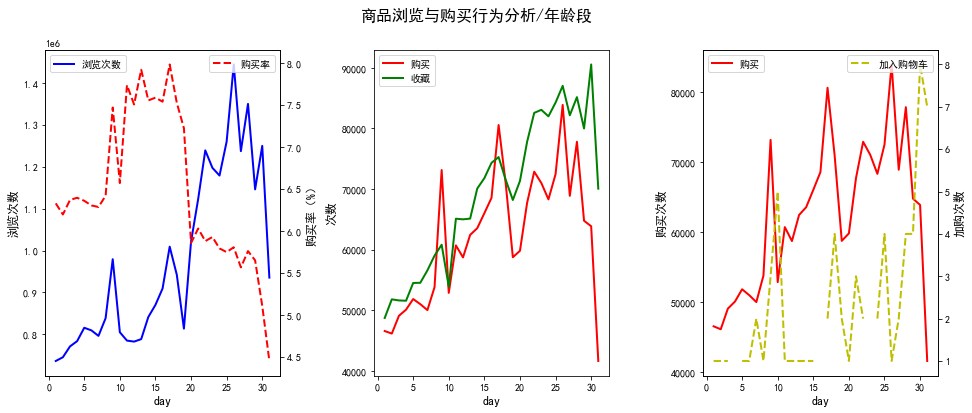

In [67]:
temp = df[df.month!=11].pivot_table(index='day',columns='action_type',values='item_id',aggfunc='count')
temp['rate'] = round(temp[2]/temp[0]*100,3)
getPlot(temp)

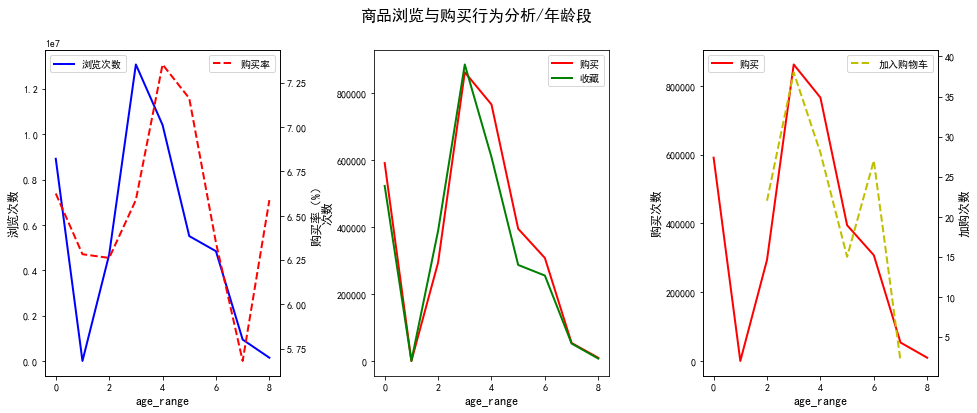

In [68]:
temp = df.pivot_table(index='age_range',columns='action_type',values='item_id',aggfunc='count')
temp['rate'] = round(temp[2]/temp[0]*100,3)
getPlot(temp)

In [42]:
df = df.rename(columns={'seller_id':'merchant_id'})

In [62]:
train = pd.read_csv("train_format1.csv")
test = pd.read_csv("test_format1.csv")
print(test.shape)
test.isnull().sum()

(261477, 3)


user_id             0
merchant_id         0
prob           261477
dtype: int64

#### 商家特征

In [53]:
seller_feature = df.pivot_table(index='merchant_id',columns='action_type',values='item_id',aggfunc='count')
for i in range(4):
    seller_feature[i].fillna(0,inplace=True)
seller_feature = seller_feature.reset_index()
seller_feature.columns = ['merchan','click_count','cart_count','sell_count','star_count']
seller_feature.head()

,merchant_id,click_count,cart_count,sell_count,star_count
0,1,308236.0,0.0,17705.0,12755.0
1,2,2030.0,0.0,189.0,144.0
2,3,2399.0,0.0,67.0,175.0
3,4,2646.0,0.0,292.0,164.0
4,5,7483.0,0.0,144.0,556.0


In [58]:
train = train.merge(seller_feature,on="merchant_id",how='left')
test = test.merge(seller_feature,on="merchant_id",how='left')

#### 用户特征

In [59]:
for i in (0,2,3):
    user_group = df[(df['time_stamp']<1111) & (df['action_type']==i)].groupby(
        ["user_id","merchant_id"]).count()[["action_type"]].reset_index()
    train = train.merge(user_group, on=['user_id','merchant_id'],how='left').rename(
        columns={'action_type':'action_type{}'.format(i)})
    test = test.merge(user_group, on=['user_id','merchant_id'],how='left').rename(
        columns={'action_type':'action_type{}'.format(i)})
    gc.collect()

In [31]:
for i in (0,2,3):
    user_group = df[(df['time_stamp']==1111) & (df['action_type']==i)].groupby(
        ["user_id","merchant_id"]).count()[["action_type"]].reset_index()
    train = train.merge(user_group, on=['user_id','merchant_id'],how='left').rename(
        columns={'action_type':'action_type{}_in1111'.format(i)})
    test = test.merge(user_group, on=['user_id','merchant_id'],how='left').rename(
        columns={'action_type':'action_type{}_in1111'.format(i)})
    gc.collect()

In [32]:
train = train.fillna(0)
test = test.fillna(0)

In [33]:
for i in (0,2,3):#计算双十一当天 与 双十一之前行为的比值
    train['action{}_rate'.format(i)] = train.apply(lambda x:x['action_type{}_in1111'.format(i)]/x['action_type{}'.format(i)] if x['action_type{}'.format(i)]>0 else 0, axis=1)
    test['action{}_rate'.format(i)] = test.apply(lambda x:x['action_type{}_in1111'.format(i)]/x['action_type{}'.format(i)] if x['action_type{}'.format(i)]>0 else 0, axis=1)

#### 用户在这个商家的特征

In [34]:
temp = df[df.action_type==0].groupby(['user_id','merchant_id']).time_stamp.agg(['nunique']).reset_index()#看了几天
temp.columns = ['user_id','merchant_id','view_day_num']
train = pd.merge(train,temp,how='left',on=['user_id','merchant_id'])
gc.collect()
temp = df[df.action_type==2].groupby(['user_id','merchant_id']).time_stamp.agg(['nunique']).reset_index()#买了几天
temp.columns = ['user_id','merchant_id','buy_day_num']
train = pd.merge(train,temp,how='left',on=['user_id','merchant_id'])
gc.collect()
temp = df[df.action_type==2].groupby(['user_id','merchant_id']).item_id.agg(['nunique']).reset_index()#买了几样商品
temp.columns = ['user_id','merchant_id','sku']
train = pd.merge(train,temp,how='left',on=['user_id','merchant_id'])
gc.collect()
temp = df[df.action_type==0].groupby(['user_id','merchant_id']).item_id.agg(['nunique']).reset_index()#看了几样商品
temp.columns = ['user_id','merchant_id','view_sku']
train = pd.merge(train,temp,how='left',on=['user_id','merchant_id'])
gc.collect()
temp = df[df.action_type==2].groupby(['user_id','merchant_id']).cat_id.agg(['nunique']).reset_index()#买了几类商品
temp.columns = ['user_id','merchant_id','cat_num']
train = pd.merge(train,temp,how='left',on=['user_id','merchant_id'])
gc.collect()
temp = df[df.action_type==0].groupby(['user_id','merchant_id']).cat_id.agg(['nunique']).reset_index()#看了几类商品
temp.columns = ['user_id','merchant_id','view_cat_num']
train = pd.merge(train,temp,how='left',on=['user_id','merchant_id'])
gc.collect()
max_day = pd.to_datetime(df['time_stamp'].max(), format='%m%d')
temp = df.groupby(['user_id','merchant_id']).time_stamp.agg('min').reset_index()#第一次购买距双十一多久
temp.columns = ['user_id','merchant_id','L']
temp['L'] = pd.to_datetime(temp['L'], format='%m%d')
temp['L'] = (max_day-temp['L']).dt.days
train = pd.merge(train,temp,how='left',on=['user_id','merchant_id'])
gc.collect()
train = pd.merge(train,user,how='left',on=['user_id'])#数据中有些存在 没点击但有购买的行，对此进行填充
train.loc[train.view_day_num.isnull(),'view_day_num'] = train.loc[train.view_day_num.isnull(),'buy_day_num']
train.loc[train.view_sku.isnull(),'view_sku'] = train.loc[train.view_sku.isnull(),'sku']
train.loc[train.view_cat_num.isnull(),'view_cat_num'] = train.loc[train.view_cat_num.isnull(),'cat_num']
train = train.fillna(0)

In [35]:
temp = df[df.action_type==0].groupby(['user_id','merchant_id']).time_stamp.agg(['nunique']).reset_index()#看了几天
temp.columns = ['user_id','merchant_id','view_day_num']
test = pd.merge(test,temp,how='left',on=['user_id','merchant_id'])
gc.collect()
temp = df[df.action_type==2].groupby(['user_id','merchant_id']).time_stamp.agg(['nunique']).reset_index()#买了几天
temp.columns = ['user_id','merchant_id','buy_day_num']
test = pd.merge(test,temp,how='left',on=['user_id','merchant_id'])
gc.collect()
temp = df[df.action_type==2].groupby(['user_id','merchant_id']).item_id.agg(['nunique']).reset_index()#买了几样商品
temp.columns = ['user_id','merchant_id','sku']
test = pd.merge(test,temp,how='left',on=['user_id','merchant_id'])
gc.collect()
temp = df[df.action_type==0].groupby(['user_id','merchant_id']).item_id.agg(['nunique']).reset_index()#看了几样商品
temp.columns = ['user_id','merchant_id','view_sku']
test = pd.merge(test,temp,how='left',on=['user_id','merchant_id'])
gc.collect()
temp = df[df.action_type==2].groupby(['user_id','merchant_id']).cat_id.agg(['nunique']).reset_index()#买了几类商品
temp.columns = ['user_id','merchant_id','cat_num']
test = pd.merge(test,temp,how='left',on=['user_id','merchant_id'])
gc.collect()
temp = df[df.action_type==0].groupby(['user_id','merchant_id']).cat_id.agg(['nunique']).reset_index()#看了几类商品
temp.columns = ['user_id','merchant_id','view_cat_num']
test = pd.merge(test,temp,how='left',on=['user_id','merchant_id'])
gc.collect()
temp = df.groupby(['user_id','merchant_id']).time_stamp.agg('min').reset_index()#第一次购买距双十一多久
temp.columns = ['user_id','merchant_id','L']
temp['L'] = pd.to_datetime(temp['L'], format='%m%d')
temp['L'] = (max_day-temp['L']).dt.days
test = pd.merge(test,temp,how='left',on=['user_id','merchant_id'])
gc.collect()
test = pd.merge(test,user,how='left',on=['user_id'])#数据中有些存在 没点击但有购买的行，对此进行填充
test.loc[test.view_day_num.isnull(),'view_day_num'] = test.loc[test.view_day_num.isnull(),'buy_day_num']
test.loc[test.view_sku.isnull(),'view_sku'] = test.loc[test.view_sku.isnull(),'sku']
test.loc[test.view_cat_num.isnull(),'view_cat_num'] = test.loc[test.view_cat_num.isnull(),'cat_num']
test = test.fillna(0)

In [36]:
train.head()

,user_id,merchant_id,label,click_count,cart_count,sell_count,star_count,action_type0,action_type2,action_type3,...,action3_rate,view_day_num,buy_day_num,sku,view_sku,cat_num,view_cat_num,L,age_range,gender
0,34176,3906,0,14870.0,1.0,410.0,961.0,33.0,0.0,2.0,...,0.0,8.0,1.0,1.0,19.0,1.0,5.0,23.0,6.0,0.0
1,34176,121,0,72265.0,0.0,4780.0,2699.0,8.0,0.0,0.0,...,0.0,3.0,1.0,1.0,1.0,1.0,1.0,4.0,6.0,0.0
2,34176,4356,1,6094.0,0.0,963.0,196.0,6.0,0.0,0.0,...,0.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,6.0,0.0
3,34176,2217,0,52230.0,0.0,3721.0,4150.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,0.0
4,230784,4818,0,43268.0,1.0,2733.0,1959.0,6.0,0.0,0.0,...,0.0,3.0,1.0,1.0,1.0,1.0,1.0,4.0,0.0,0.0


In [37]:
train.to_csv('train.csv',index = False)
test.to_csv('test.csv',index = False)